# Product Demand Prediction Using Machine Learning 

## Applied Data Science Phase-4

In [1]:
# by: I.Mohamed Sameer(211521243099)
#     V.Deepak(211521243038)
#     R.Allwin Jeyaraj(211521243010)
#     A.Ejas Mohamed(211521243052)      
#     R.S.Ashwin(211521243024)

## 1. Importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 2.Importing Dataset

In [3]:
df = pd.read_csv("poductdemand.csv")
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [4]:
# Data Preprocessing
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64


In [5]:
# since there is one  null value in total price we need to fix 

## Feature Engineering


In [6]:
# 2.Feature Engineering
# Profit Margin
df['Profit Margin'] = (df['Total Price'] - df['Base Price']) / df['Total Price']

# Sales per Unit Price
df['Sales per Unit Price'] = df['Units Sold'] / np.where((df['Total Price'] - df['Base Price']) != 0, (df['Total Price'] - df['Base Price']), 1)

# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
df[['Total Price', 'Base Price', 'Units Sold', 'Profit Margin', 'Sales per Unit Price']] = imputer.fit_transform(df[['Total Price', 'Base Price', 'Units Sold', 'Profit Margin', 'Sales per Unit Price']])

df

,ID,Store ID,Total Price,Base Price,Units Sold,Profit Margin,Sales per Unit Price
0,1,8091,99.0375,111.8625,20.0,-0.129496,-1.559454
1,2,8091,99.0375,99.0375,28.0,0.000000,28.000000
2,3,8091,133.9500,133.9500,19.0,0.000000,19.000000
3,4,8091,133.9500,133.9500,44.0,0.000000,44.000000
4,5,8091,141.0750,141.0750,52.0,0.000000,52.000000
...,...,...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38.0,0.000000,38.000000
150146,212639,9984,235.8375,235.8375,30.0,0.000000,30.000000
150147,212642,9984,357.6750,483.7875,31.0,-0.352590,-0.245812
150148,212643,9984,141.7875,191.6625,12.0,-0.351759,-0.240602


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    150150 non-null  int64  
 1   Store ID              150150 non-null  int64  
 2   Total Price           150150 non-null  float64
 3   Base Price            150150 non-null  float64
 4   Units Sold            150150 non-null  float64
 5   Profit Margin         150150 non-null  float64
 6   Sales per Unit Price  150150 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 8.0 MB


In [8]:
df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold,Profit Margin,Sales per Unit Price
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206,-0.068560,28.331991
std,61386.037861,615.591445,103.308172,110.961712,60.207904,0.164063,39.263345
min,1.000000,8023.000000,41.325000,61.275000,1.000000,-4.672414,-1027.368421
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000,0.000000,1.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000,0.000000,21.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000,0.000000,42.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000,0.340000,991.000000


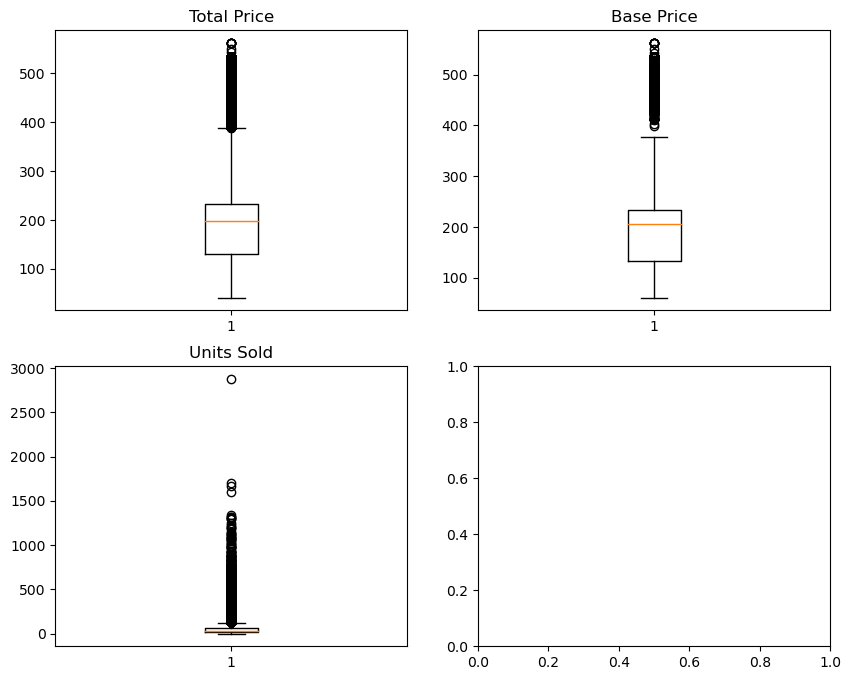

In [9]:
# 3.Check for Outliers
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].boxplot(df['Total Price'])
axs[0, 0].set_title('Total Price')

axs[0, 1].boxplot(df['Base Price'])
axs[0, 1].set_title('Base Price')

axs[1, 0].boxplot(df['Units Sold'])
axs[1, 0].set_title('Units Sold')

plt.show()


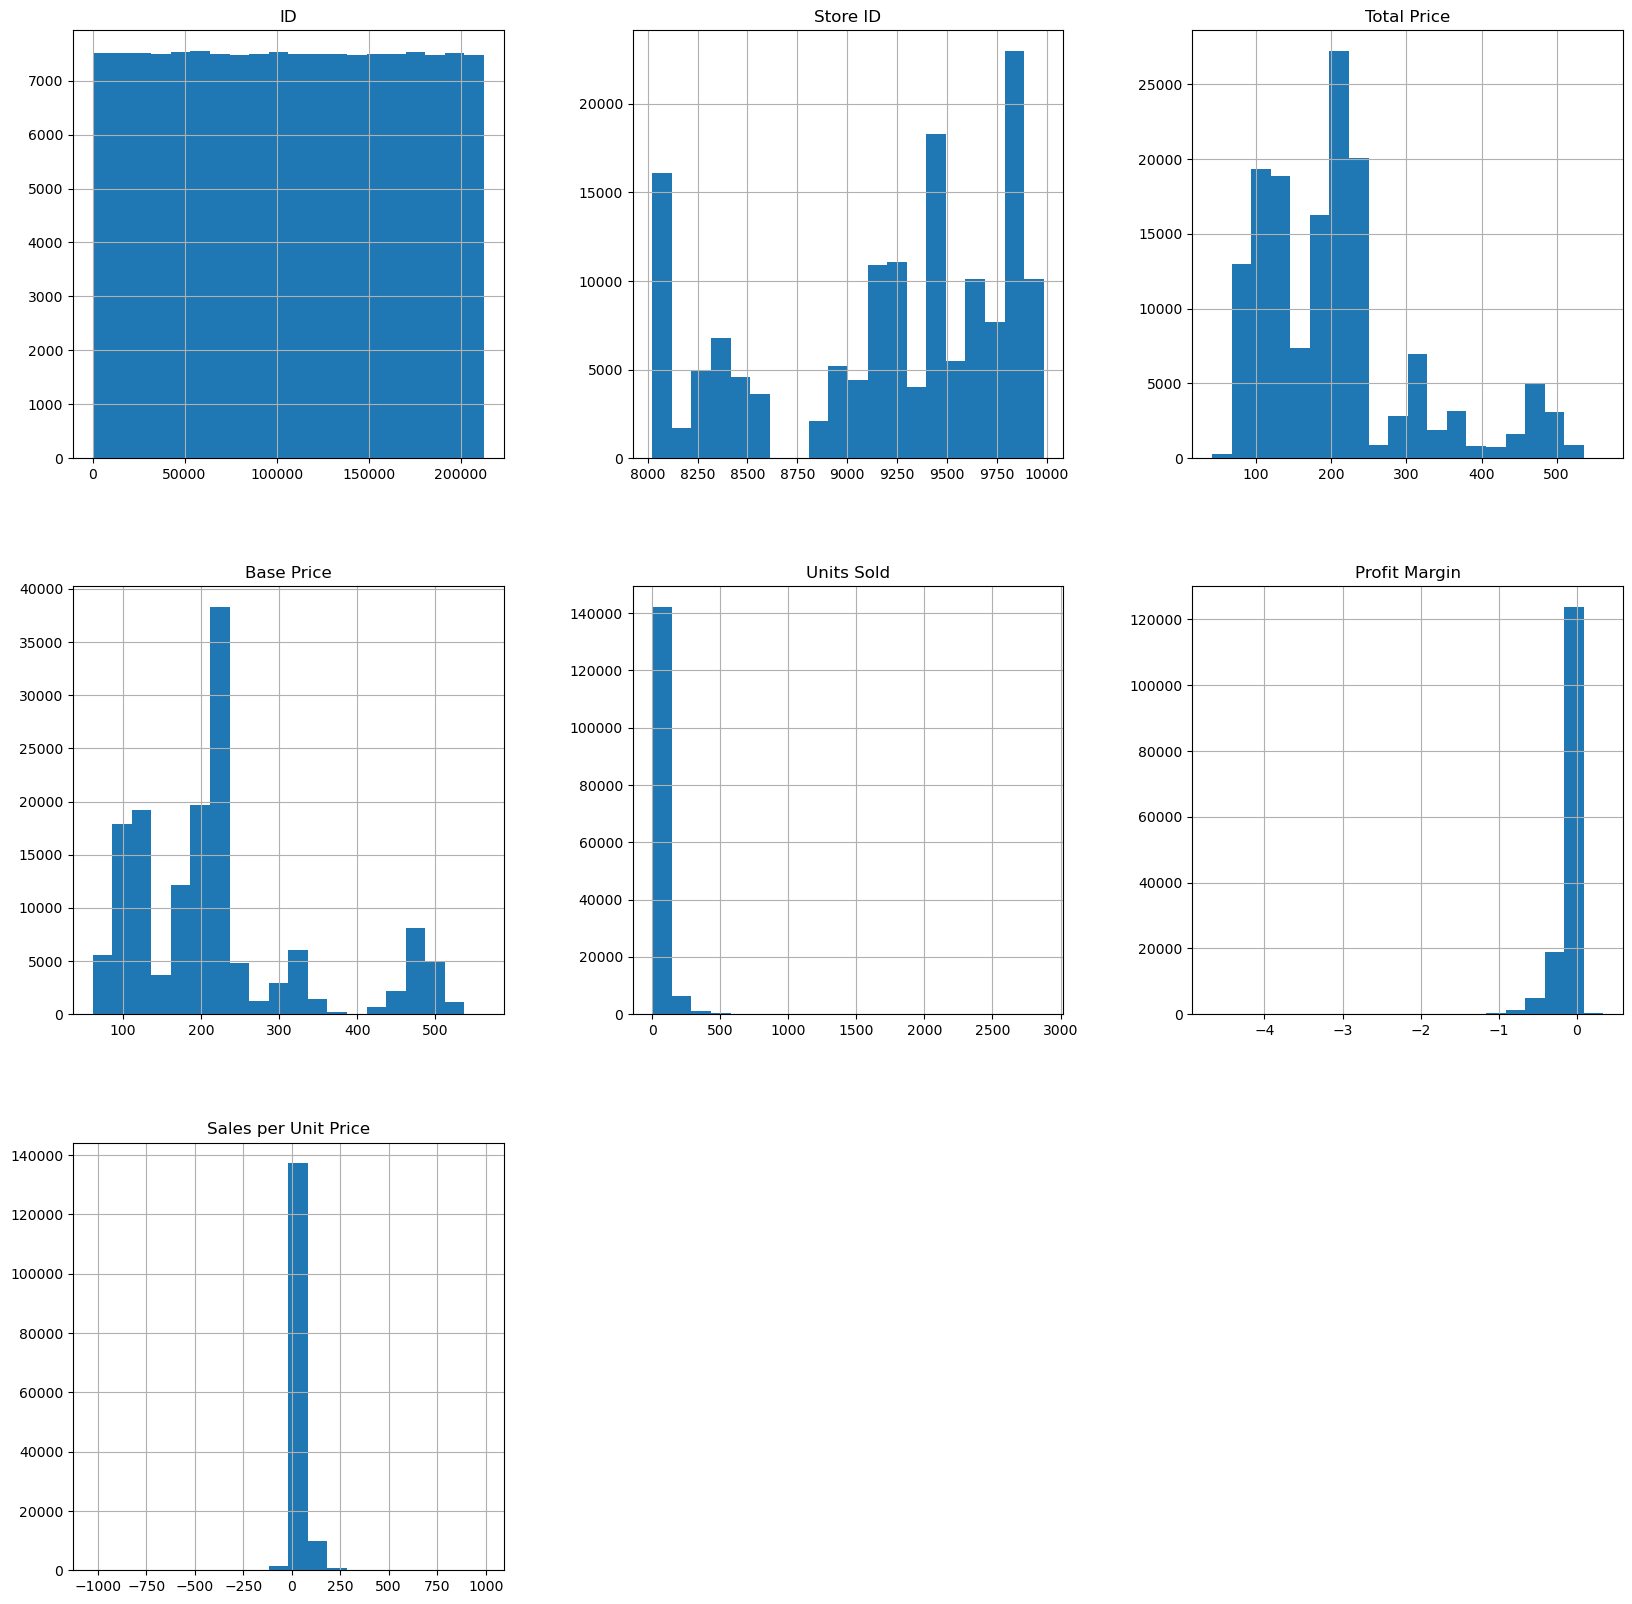

In [10]:
# Exploratory Data Analysis (EDA)
# 4. Histograms for numerical features
df.hist(bins=20, figsize=(20, 20))
plt.show()

C:\ananconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


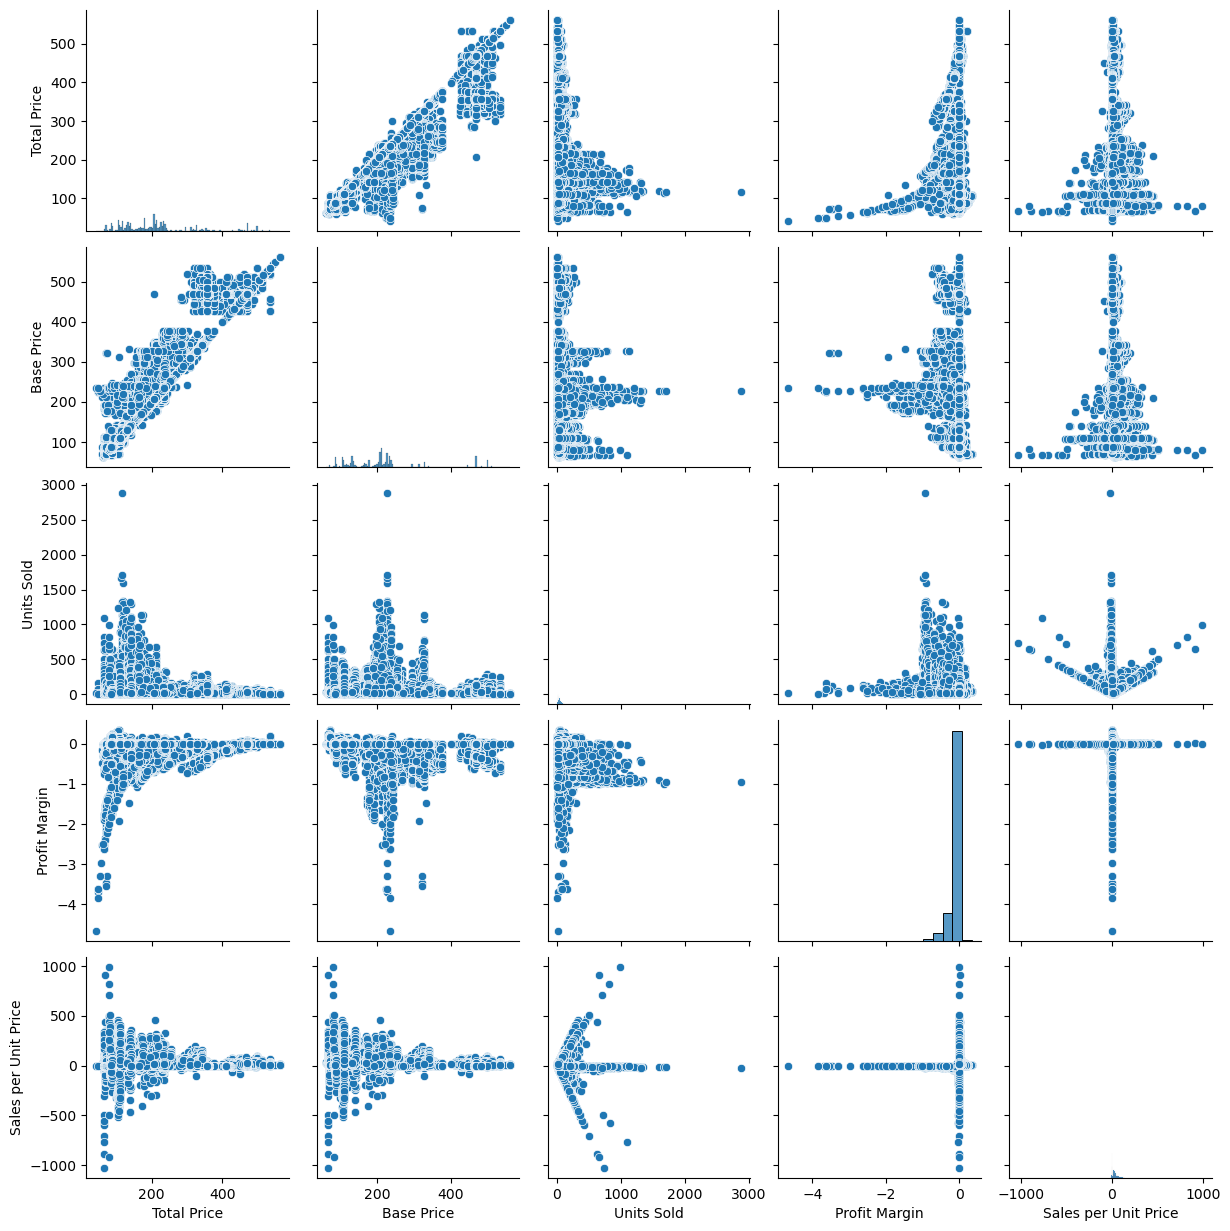

In [11]:
# 5.Pairplot for numerical variables
sns.pairplot(df[['Total Price', 'Base Price', 'Units Sold', 'Profit Margin', 'Sales per Unit Price']])
plt.show()

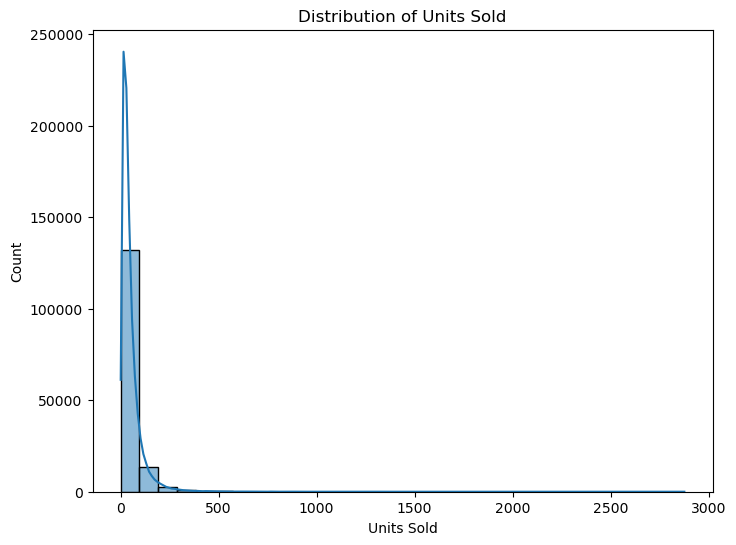

In [12]:
# 6.Distribution of 'Units Sold'
plt.figure(figsize=(8, 6))
sns.histplot(df['Units Sold'], bins=30, kde=True)
plt.title('Distribution of Units Sold')
plt.show()

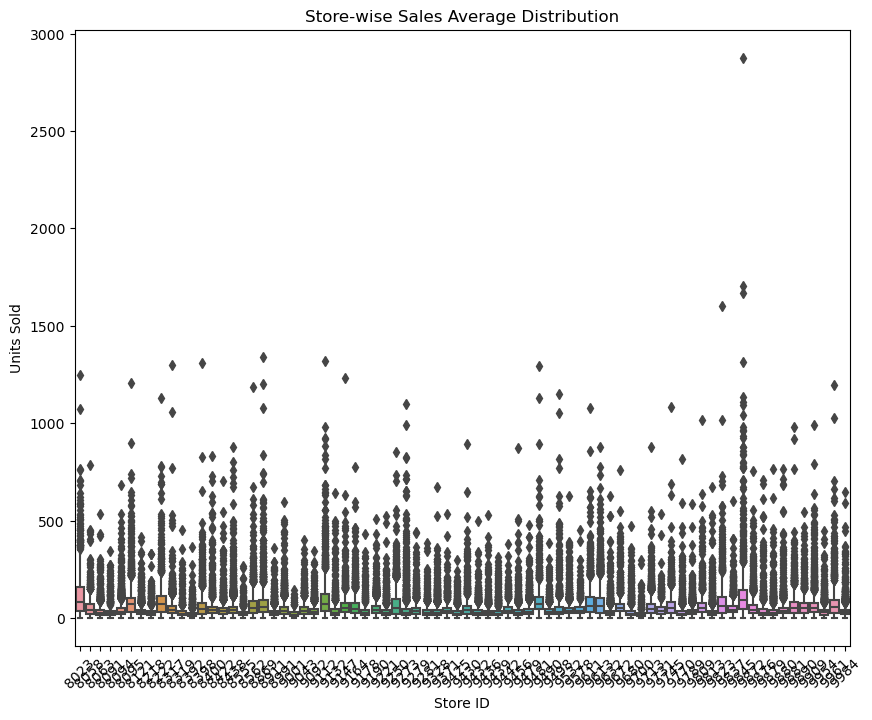

In [13]:
# 7.Boxplot for 'Store-wise Sales Average'
plt.figure(figsize=(10, 8))
sns.boxplot(x='Store ID', y='Units Sold', data=df)
plt.title('Store-wise Sales Average Distribution')
plt.xticks(rotation=45)
plt.show()

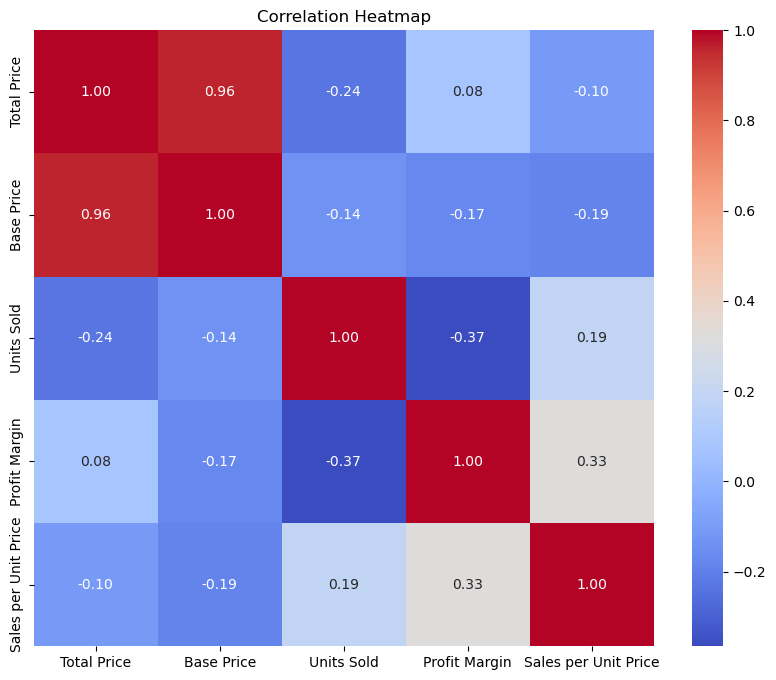

In [14]:
# 8.Correlation Heatmap
correlation_matrix = df[['Total Price', 'Base Price', 'Units Sold', 'Profit Margin', 'Sales per Unit Price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

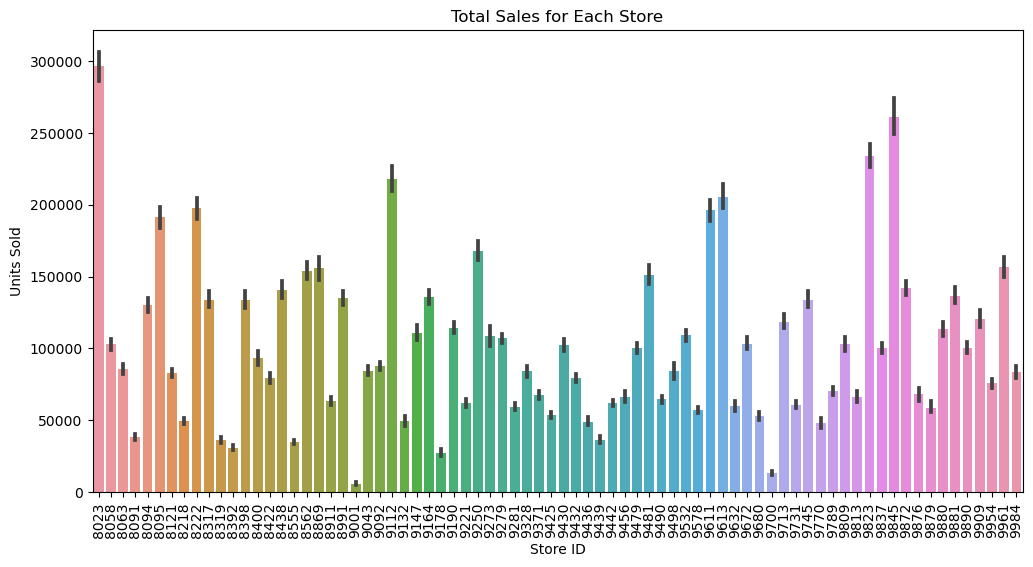

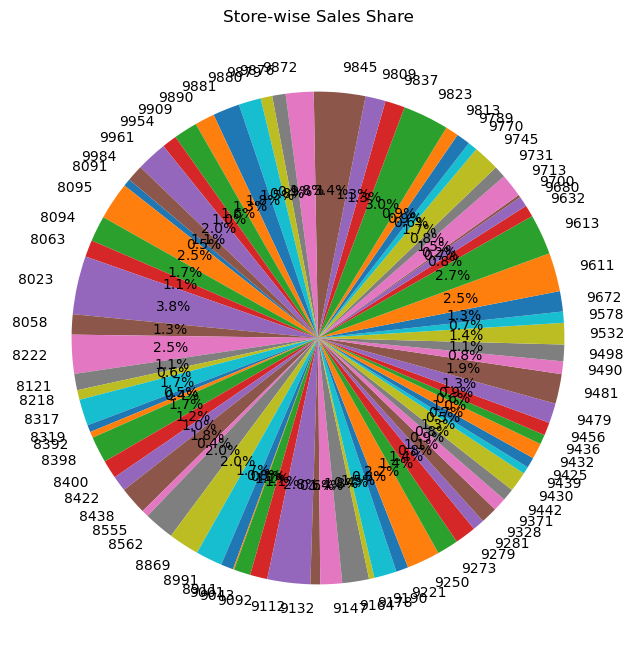

In [15]:
# 9. Store-wise Sales Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Store ID', y='Units Sold', data=df, estimator=sum)
plt.title('Total Sales for Each Store')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

plt.figure(figsize=(8, 8))
df['Store-wise Sales Share'] = df.groupby('Store ID')['Units Sold'].transform(lambda x: sum(x) / sum(df['Units Sold']))
store_sales_share = df[['Store ID', 'Store-wise Sales Share']].drop_duplicates()
plt.pie(store_sales_share['Store-wise Sales Share'], labels=store_sales_share['Store ID'], autopct='%1.1f%%', startangle=140)
plt.title('Store-wise Sales Share')
plt.show()


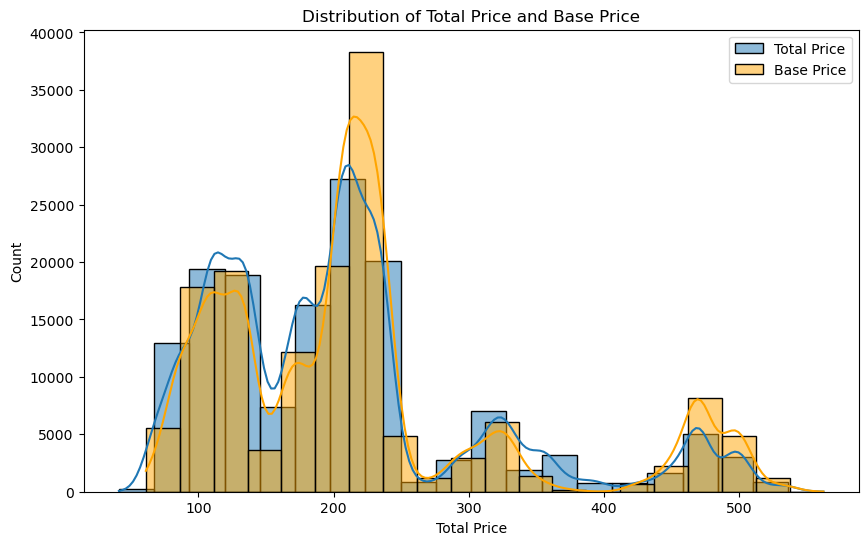

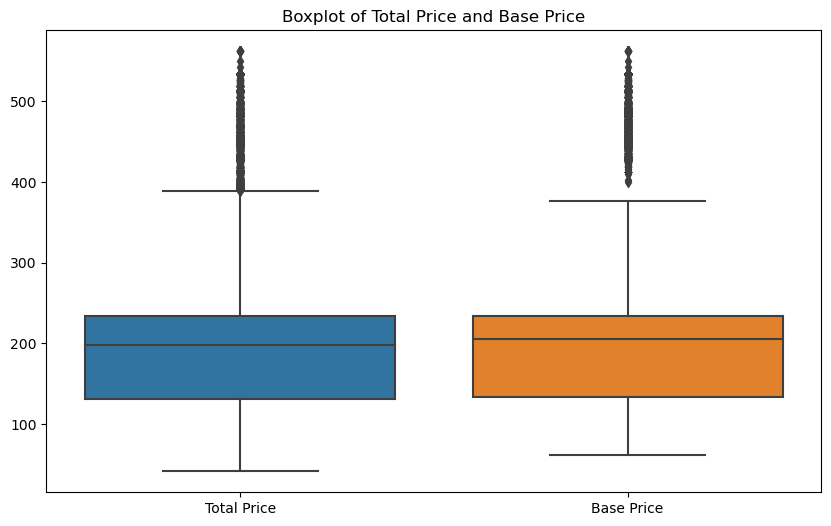

In [16]:
# 10.Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Price'], bins=20, kde=True, label='Total Price')
sns.histplot(df['Base Price'], bins=20, kde=True, label='Base Price', color='orange')
plt.title('Distribution of Total Price and Base Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Total Price', 'Base Price']])
plt.title('Boxplot of Total Price and Base Price')
plt.show()

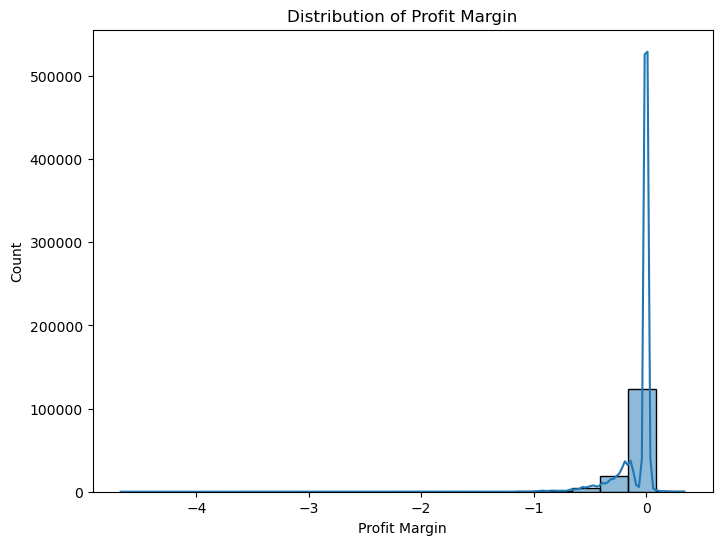

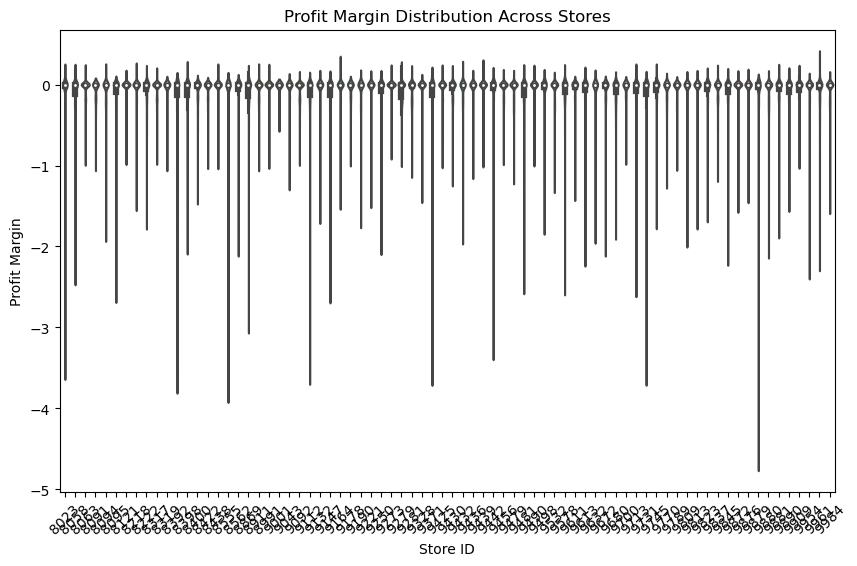

In [17]:
# 11.Profit Margin Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['Profit Margin'], bins=20, kde=True)
plt.title('Distribution of Profit Margin')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Store ID', y='Profit Margin', data=df)
plt.title('Profit Margin Distribution Across Stores')
plt.xticks(rotation=45)
plt.show()

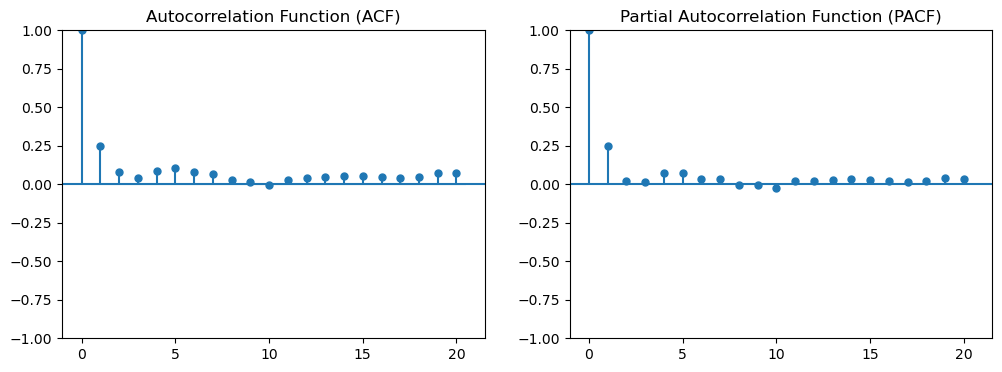

                               SARIMAX Results                                
Dep. Variable:             Units Sold   No. Observations:               150150
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -822685.128
Date:                Wed, 25 Oct 2023   AIC                        1645376.256
Time:                        13:51:24   BIC                        1645406.014
Sample:                             0   HQIC                       1645385.125
                             - 150150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2222      0.001    206.462      0.000       0.220       0.224
ma.L1         -0.9930      0.000  -3588.833      0.000      -0.994      -0.992
sigma2      3362.1974      1.878   1790.397      0.0

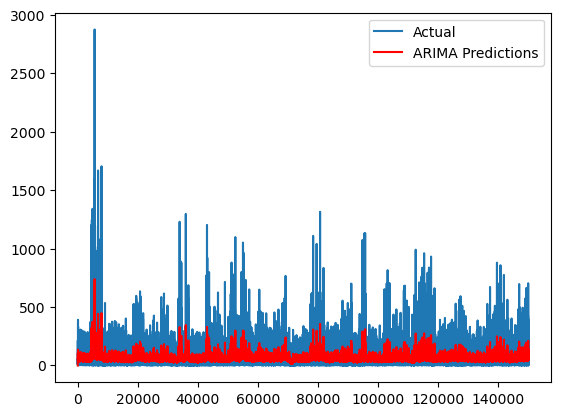

In [18]:

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(df['Units Sold'], lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['Units Sold'], lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

# ARIMA Modeling
# Adjust these parameters based on your analysis
p, d, q = 1, 1, 1

# Fit ARIMA model
arima_model = ARIMA(df['Units Sold'], order=(p, d, q))
arima_results = arima_model.fit()

# Print summary of ARIMA model
print(arima_results.summary())

# Plot the original and predicted values
plt.plot(df['Units Sold'], label='Actual')
plt.plot(arima_results.fittedvalues, color='red', label='ARIMA Predictions')
plt.legend()
plt.show()

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = df.drop("Units Sold",axis=1)
y = df["Units Sold"]

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(120120, 7)

In [21]:
X_test.shape

(30030, 7)

In [22]:
y_train.shape

(120120,)

In [23]:
y_test.shape

(30030,)

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lir = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lir)
r2 = r2_score(y_test, y_pred_lir)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Convert predictions to binary (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary_lir = (y_pred_lir > threshold).astype(int)

# Calculate accuracy
accuracy_lir = accuracy_score(y_test, y_pred_binary_lir)
print(f'Accuracy: {accuracy_lir * 100:.2f}%')


Mean Squared Error: 2176.8115019517736
R-squared: 0.33656574151253493
Accuracy: 0.23%


## Gaussian NB

In [25]:
from sklearn.naive_bayes import GaussianNB

# Train the model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb * 100:.2f}%')


Accuracy: 8.23%


## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')


Accuracy: 1.80%


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt * 100:.2f}%')


Accuracy: 81.95%


## Random Forest

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Downsample the data
df_downsampled = df.sample(frac=0.1, random_state=42)

# Split into features and target
X_downsampled = df_downsampled.drop('Units Sold', axis=1)
y_downsampled = df_downsampled['Units Sold']

# Split into train and test sets
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_ds, y_train_ds)

# Make predictions
y_pred_rf_ds = rf.predict(X_test_ds)

# Calculate accuracy
accuracy_rf_ds = accuracy_score(y_test_ds, y_pred_rf_ds)
print(f'Accuracy: {accuracy_rf_ds * 100:.2f}%')


Accuracy: 47.45%


## SVM

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample a smaller subset of your data
subset_size = 10000  # Adjust the size as needed
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=subset_size, random_state=42)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with SVM and RBF kernel
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm * 100:.2f}%')


Accuracy: 4.10%


## XGBoost

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and labels (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Convert predicted values to classes (0 or 1) based on a threshold
threshold = 0.5
y_pred_classes = [1 if val > threshold else 0 for val in y_pred_xgb]

# Convert actual values to classes (assuming binary classification)
y_true_classes = [1 if val > threshold else 0 for val in y_test]

# Calculate accuracy
accuracy_xgb = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy using XGBoost: {accuracy_xgb * 100:.2f}%')


Accuracy using XGBoost: 99.98%


## Output final score

In [31]:
scores = [accuracy_lir,accuracy_nb, accuracy_knn, accuracy_dt, accuracy_rf_ds, accuracy_svm,accuracy_xgb]
algorithms = ["Linear Regression","Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "Support Vector Machine","XGBoost"]

for i in range(len(algorithms)):
    percentage_score = round(scores[i] * 100, 2)
    print(f"The accuracy score achieved using {algorithms[i]} is: {percentage_score} %")


The accuracy score achieved using Linear Regression is: 0.23 %
The accuracy score achieved using Naive Bayes is: 8.23 %
The accuracy score achieved using K-Nearest Neighbors is: 1.8 %
The accuracy score achieved using Decision Tree is: 81.95 %
The accuracy score achieved using Random Forest is: 47.45 %
The accuracy score achieved using Support Vector Machine is: 4.1 %
The accuracy score achieved using XGBoost is: 99.98 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

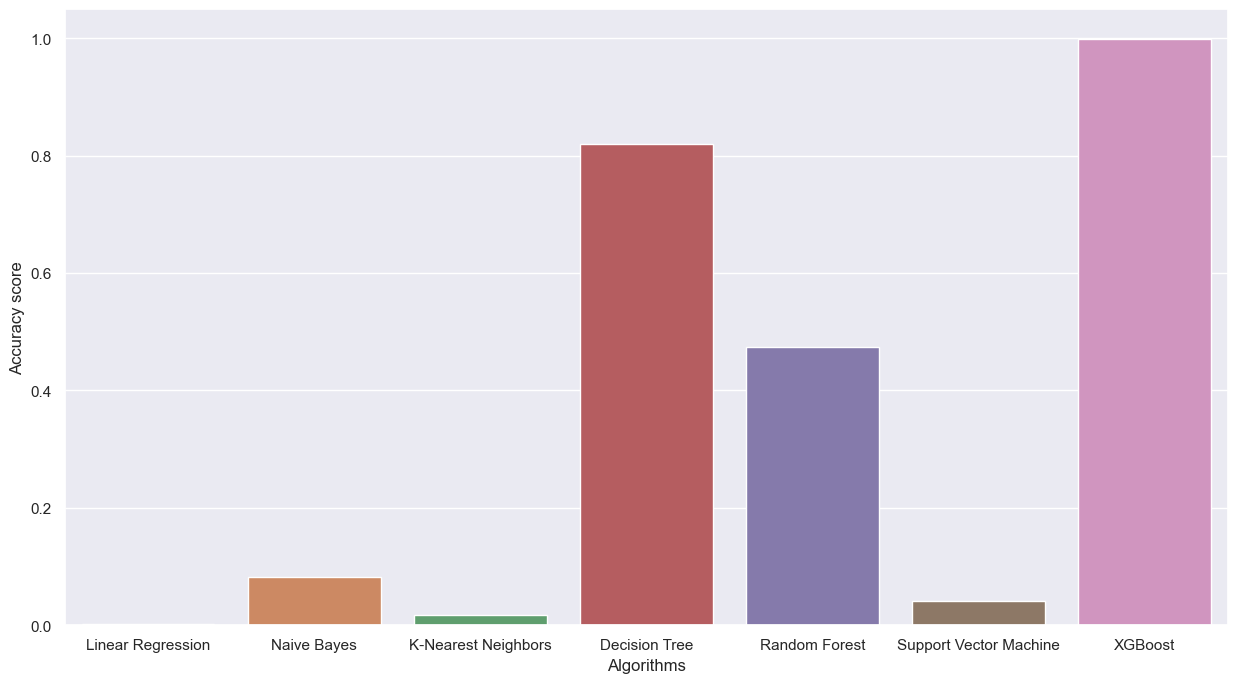

In [32]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores,data=df)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have true labels (y_test) and predicted labels for each algorithm

# Evaluation for Linear Regression
print("Evaluation metrics for Linear Regression:")
mse_lir = mean_squared_error(y_test, y_pred_lir)
mae_lir = mean_absolute_error(y_test, y_pred_lir)
r2_lir = r2_score(y_test, y_pred_lir)

print("Mean Squared Error:", mse_lir)
print("Mean Absolute Error:", mae_lir)
print("R-squared:", r2_lir)


Evaluation metrics for Linear Regression:
Mean Squared Error: 2176.8115019517736
Mean Absolute Error: 24.803284847206207
R-squared: 0.33656574151253493


In [34]:
# Evaluation for Naive Bayes
print("\nEvaluation metrics for Naive Bayes:")
mse_nb = mean_squared_error(y_test, y_pred_nb)
mae_nb = mean_absolute_error(y_test, y_pred_nb)
r2_nb = r2_score(y_test, y_pred_nb)

print("Mean Squared Error:", mse_nb)
print("Mean Absolute Error:", mae_nb)
print("R-squared:", r2_nb)


Evaluation metrics for Naive Bayes:
Mean Squared Error: 9102.631968031968
Mean Absolute Error: 36.14671994671995
R-squared: -1.7742401602439601


In [35]:
# Evaluation for K-Nearest Neighbors
print("\nEvaluation metrics for K-Nearest Neighbors:")
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("R-squared:", r2_knn)


Evaluation metrics for K-Nearest Neighbors:
Mean Squared Error: 3642.8908757908757
Mean Absolute Error: 33.07908757908758
R-squared: -0.1102562646164369


In [36]:
# Evaluation for Decision Tree
print("\nEvaluation metrics for Decision Tree:")
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("R-squared:", r2_dt)


Evaluation metrics for Decision Tree:
Mean Squared Error: 144.1952713952714
Mean Absolute Error: 2.1764235764235766
R-squared: 0.9560531158211235


In [37]:
# XGBoost
print("\nEvaluation metrics for XGBoost:")
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Mean Squared Error:", mse_xgb)
print("Mean Absolute Error:", mae_xgb)
print("R-squared:", r2_xgb)



Evaluation metrics for XGBoost:
Mean Squared Error: 48.160360343184855
Mean Absolute Error: 1.8206068340298178
R-squared: 0.9853220028816818
